In [80]:
import tensorflow as tf       #tensorflow Image classification Tutorial from codebasics
import numpy as np
import cv2
import os
import PIL  #image library
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.preprocessing import RandomFlip, RandomRotation, RandomZoom # Import data augmentation layers

# **1) Data**

## **1.1) Download Data from URL**

In [2]:
import tarfile

# Define URLs and paths
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = './datasets'
tgz_filename = 'flower_photos.tgz'
tgz_path = os.path.join(data_dir, tgz_filename)
target_extract_dir = os.path.join(data_dir, 'flower_photos')

# Step 1: Download the dataset (without extracting)
tgz_path = tf.keras.utils.get_file(fname=tgz_filename,origin=dataset_url,cache_dir=data_dir,
    cache_subdir='.',  # Saves directly in './datasets'
    extract=False
)

# Step 2: Extract manually to the desired directory
with tarfile.open(tgz_path, 'r:gz') as tar:
    tar.extractall(path=data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#import shutil #delete the file if you made a mistake
#shutil.rmtree('datasets')

In [4]:
print(data_dir)

./datasets


In [5]:
data_dir = './datasets/flower_photos' #manually change dir

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
len(list(data_dir.glob('*/*.jpg'))) #image count in folder

3670

In [21]:
roses = list(data_dir.glob('roses/*.jpg')) #image count in folder
len(roses)
#roses[:5]

641

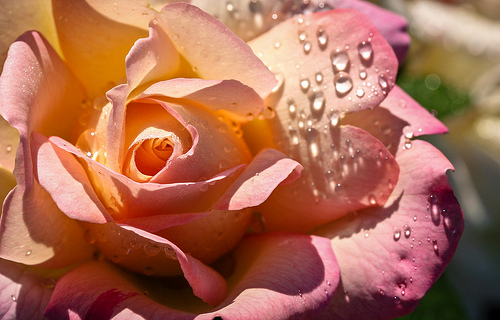

In [47]:
PIL.Image.open(str(roses[3]))

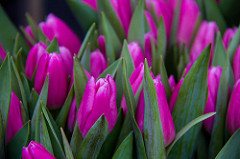

In [25]:
tulips = list(data_dir.glob('tulips/*.jpg')) #image count in folder
PIL.Image.open(str(tulips[611]))

## **1.2) Create dictionaries**

In [27]:
#dictionary contains all image paths of class
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_image_dict['tulips']

[PosixPath('datasets/flower_photos/tulips/132538272_63658146d9_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13542672763_20c3cb9272.jpg'),
 PosixPath('datasets/flower_photos/tulips/13514131694_d91da4f4fc.jpg'),
 PosixPath('datasets/flower_photos/tulips/391477275_7c2f50a1a7_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/8668974855_8389ecbdca_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/7070694881_e9a331fa4e_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2813649953_2b0f20fe94_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14015957646_8317a0f1d9_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2813658587_337eeef124_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3511104954_54eace015c_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/924782410_94ed7913ca_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/8605564823_7a59d3d92a.jpg'),
 PosixPath('datasets/flower_photos/tulips/38287568_627de6ca20.jpg'),
 PosixPath('datasets/flower_photos/tulips/3476945045_97ff41e8

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[171, 160, 122],
        [ 51,  69,  32],
        [162, 119, 102],
        ...,
        [189, 117, 241],
        [ 48,  47, 119],
        [ 61, 157, 187]],

       [[164, 153, 109],
        [ 75,  46,  25],
        [247, 183, 182],
        ...,
        [ 88,  52, 212],
        [ 42,   9, 178],
        [132,  73, 255]],

       [[112,  97,  64],
        [148,  81,  60],
        [253, 204, 182],
        ...,
        [  0,   0, 171],
        [ 53,  25, 185],
        [165, 101, 244]],

       ...,

       [[ 10,  24,  52],
        [ 11,  25,  53],
        [ 11,  22,  50],
        ...,
        [137, 199, 187],
        [122, 201, 188],
        [113, 206, 191]],

       [[  4,  25,  53],
        [  5,  23,  52],
        [  0,  18,  47],
        ...,
        [141, 207, 195],
        [150, 216, 205],
        [156, 222, 211]],

       [[ 12,  23,  55],
        [ 10,  21,  53],
        [ 11,  20,  53],
        ...,
        [153, 206, 196],
        [167, 211, 204],
        [178, 212, 206]]], dtype=uint8)
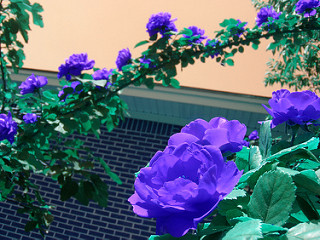

In [51]:
img = cv2.imread(flowers_image_dict['roses'][0]) #imread(path)
img

In [38]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [52]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))  # Make sure to store the resized image
        X.append(resized_img)  # Append the resized image
        y.append(flowers_labels_dict[flower_name])  # Append the corresponding label

array([[[ 84, 110, 154],
        [ 84, 117, 161],
        [ 85, 119, 162],
        ...,
        [108, 138, 173],
        [104, 135, 170],
        [102, 133, 167]],

       [[ 79, 105, 151],
        [ 82, 114, 157],
        [ 85, 118, 161],
        ...,
        [102, 130, 165],
        [100, 129, 164],
        [ 96, 126, 161]],

       [[ 79, 105, 151],
        [ 79, 109, 156],
        [ 86, 119, 163],
        ...,
        [ 98, 127, 161],
        [ 97, 126, 159],
        [ 92, 120, 154]],

       ...,

       [[ 75,  64, 104],
        [113,  93, 152],
        [144, 129, 189],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 72,  56, 102],
        [144, 123, 184],
        [145, 130, 186],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[103,  86, 134],
        [129, 112, 165],
        [129, 113, 164],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
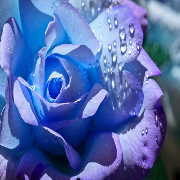

In [54]:
X[3]

In [55]:
X = np.array(X)
y = np.array(y)

#2) Train and Evaluate

## 2.1) Split Data

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
len(X_train)

2752

In [59]:
len(X_test)

918

In [62]:
X_train = X_train / 255
X_test = X_test / 255

In [64]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),   #2D array into  1D array for NN
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.3480 - loss: 1.5633
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6132 - loss: 1.0121
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7100 - loss: 0.7759
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8176 - loss: 0.5206
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 135s 990ms/step - accuracy: 0.8908 - loss: 0.3219
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9645 - loss: 0.1416
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9862 - loss: 0.0730
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9933 - loss: 0.0490
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 993ms/step - accuracy: 0.9988 - loss: 0.0151
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9910 - loss: 0.0306
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9796 - loss: 0.0568
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 978ms/step - accur

## 2.2) Evaluation

In [65]:
model.evaluate(X_test,  y_test,)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.6339 - loss: 2.9396


[2.7757558822631836, 0.6427015066146851]

In [68]:
predictions = model.predict(X_test)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step


array([[ -9.31408   ,  17.895205  ,  -8.069599  ,   6.568688  ,
         -2.69312   ],
       [  0.43585554,   1.8276105 ,  -1.4845142 ,   5.8552065 ,
         -1.9720848 ],
       [-14.781026  , -13.392627  ,  10.845267  ,  16.50478   ,
          1.3906561 ],
       ...,
       [ -2.9858613 ,  -5.19181   ,  13.036643  ,  21.118301  ,
        -14.061956  ],
       [ -1.6911547 , -12.8274765 ,  -8.769096  ,  14.388585  ,
          7.995582  ],
       [ -7.7685056 , -19.731104  ,   7.118918  ,  17.84147   ,
          0.6664107 ]], dtype=float32)

In [69]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5245867e-12, 9.9998796e-01, 5.2920485e-12, 1.2048997e-05,
       1.1444548e-09], dtype=float32)>

In [70]:
np.argmax(score) #gives location of max value

np.int64(1)

In [71]:
y_test[0]

np.int64(1)

#3) Improve Training with Augementation

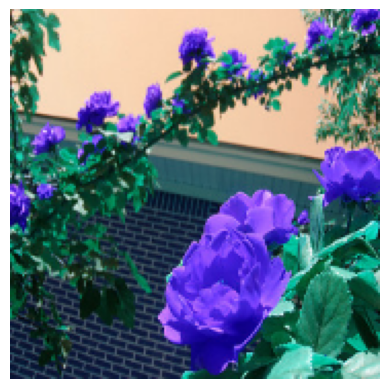

In [72]:
plt.axis('off')
plt.imshow(X[0])

In [87]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])

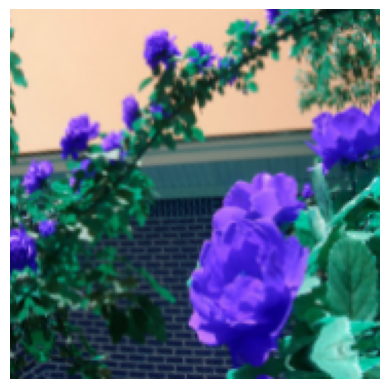

In [90]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [92]:
num_classes = 5

model = Sequential([
  data_augmentation,  #First layer augements the data and produces new data
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  #drop 20% of neurons at random each pass , better generalization
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.3229 - loss: 1.5269
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5871 - loss: 1.0544
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6306 - loss: 0.9532
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6717 - loss: 0.8363
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6879 - loss: 0.8236
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7024 - loss: 0.7342
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7200 - loss: 0.7158
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.7576 - loss: 0.6381
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7744 - loss: 0.6022
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7805 - loss: 0.5848


In [93]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.6812 - loss: 0.8522


[0.8152298331260681, 0.6960784196853638]